In [1]:
import pandas as pd
import glob
import numpy as np
import os

#visualization library for creating pretty graphs and plots
import seaborn as sns
import matplotlib.pyplot as plt 

In [10]:
path = r'C:/Users/sebjan/OneDrive/Pulpit/IML/1st_test' # use your path
all_files = glob.glob(path + "/*")

li = []

i = 0
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, sep='\t')
    df['Time'] = i
    i=i+10
    li.append(df)
    
    
data = pd.concat(li, ignore_index=True)
data.columns = ['Bearing 1 x', 'Bearing 1 y', 'Bearing 2 x', 'Bearing 2 y', 'Bearing 3 x', 'Bearing 3 y', 'Bearing 4 x', 'Bearing 4 y', 'Time']

data = data.iloc[::20, :]


In [13]:
data.head()

,Bearing 1 x,Bearing 1 y,Bearing 2 x,Bearing 2 y,Bearing 3 x,Bearing 3 y,Bearing 4 x,Bearing 4 y,Time
0,-0.115,-0.027,0.044,-0.073,-0.137,-0.032,-0.129,-0.181,0
20,-0.027,-0.193,0.029,-0.017,-0.217,-0.161,-0.112,-0.093,0
40,0.010,-0.144,0.012,-0.061,-0.173,-0.142,-0.081,-0.059,0
60,-0.061,-0.161,-0.112,0.007,-0.107,-0.264,-0.063,-0.190,0
80,0.000,-0.151,-0.083,-0.063,-0.244,-0.178,0.000,-0.212,0


In [11]:
data.shape

(2163712, 9)

In [12]:
data.info() #data has only float and int values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163712 entries, 0 to 43274220
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Bearing 1 x  float64
 1   Bearing 1 y  float64
 2   Bearing 2 x  float64
 3   Bearing 2 y  float64
 4   Bearing 3 x  float64
 5   Bearing 3 y  float64
 6   Bearing 4 x  float64
 7   Bearing 4 y  float64
 8   Time         int64  
dtypes: float64(8), int64(1)
memory usage: 148.6 MB


In [9]:
data.describe()
# mean value is smaller than median value in each column 
# there is a big difference between 75th %tile and max values in each column
# the above points suggest that there are outliers in this dataset

,Bearing 1 x,Bearing 1 y,Bearing 2 x,Bearing 2 y,Bearing 3 x,Bearing 3 y,Bearing 4 x,Bearing 4 y,filename
count,2.207744e+06,2.207744e+06,2.207744e+06,2.207744e+06,2.207744e+06,2.207744e+06,2.207744e+06,2.207744e+06,2.207744e+06
mean,-1.158817e-01,-1.156898e-01,-1.157250e-01,-1.156778e-01,-1.127967e-01,-1.130679e-01,-1.130481e-01,-1.127343e-01,1.077500e+04
std,9.887065e-02,8.931440e-02,9.484952e-02,7.868557e-02,1.179528e-01,1.216336e-01,9.650286e-02,9.894144e-02,6.223837e+03
min,-1.008000e+00,-9.010000e-01,-8.250000e-01,-7.280000e-01,-3.979000e+00,-3.079000e+00,-3.545000e+00,-3.467000e+00,0.000000e+00
25%,-1.780000e-01,-1.730000e-01,-1.780000e-01,-1.660000e-01,-1.860000e-01,-1.880000e-01,-1.660000e-01,-1.680000e-01,5.387500e+03
50%,-1.150000e-01,-1.150000e-01,-1.150000e-01,-1.150000e-01,-1.120000e-01,-1.120000e-01,-1.120000e-01,-1.120000e-01,1.077500e+04
75%,-5.100000e-02,-5.900000e-02,-5.100000e-02,-6.300000e-02,-3.900000e-02,-3.700000e-02,-6.100000e-02,-5.600000e-02,1.616250e+04
max,5.880000e-01,8.760000e-01,4.880000e-01,4.610000e-01,3.621000e+00,4.365000e+00,2.095000e+00,1.682000e+00,2.155000e+04


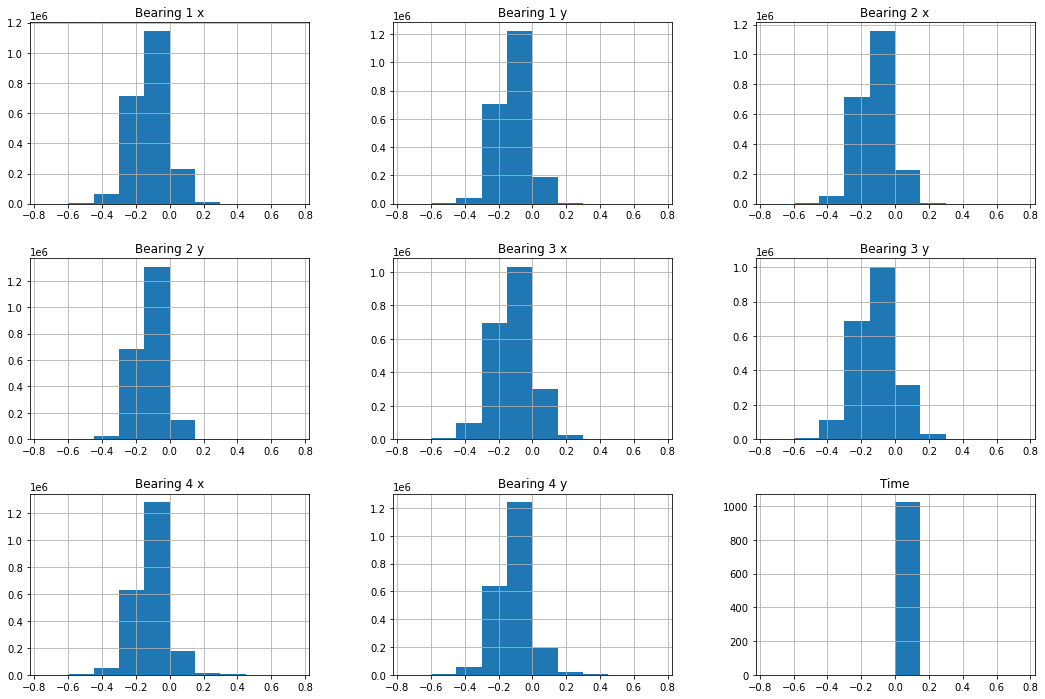

In [14]:
data.hist(range=[-0.75, 0.75], figsize=(18,12)) #all of them are exactly the same
plt.show() 

In [15]:
def makeCorrelationplot(xcol,ycol,df,toPaint):
    df.plot(x=xcol,y=ycol,kind="scatter",color='lightcoral', marker='D',ax=toPaint)
    xvec = df[xcol]
    yvec = df[ycol]
    m, b = np.polyfit(xvec, yvec, 1)

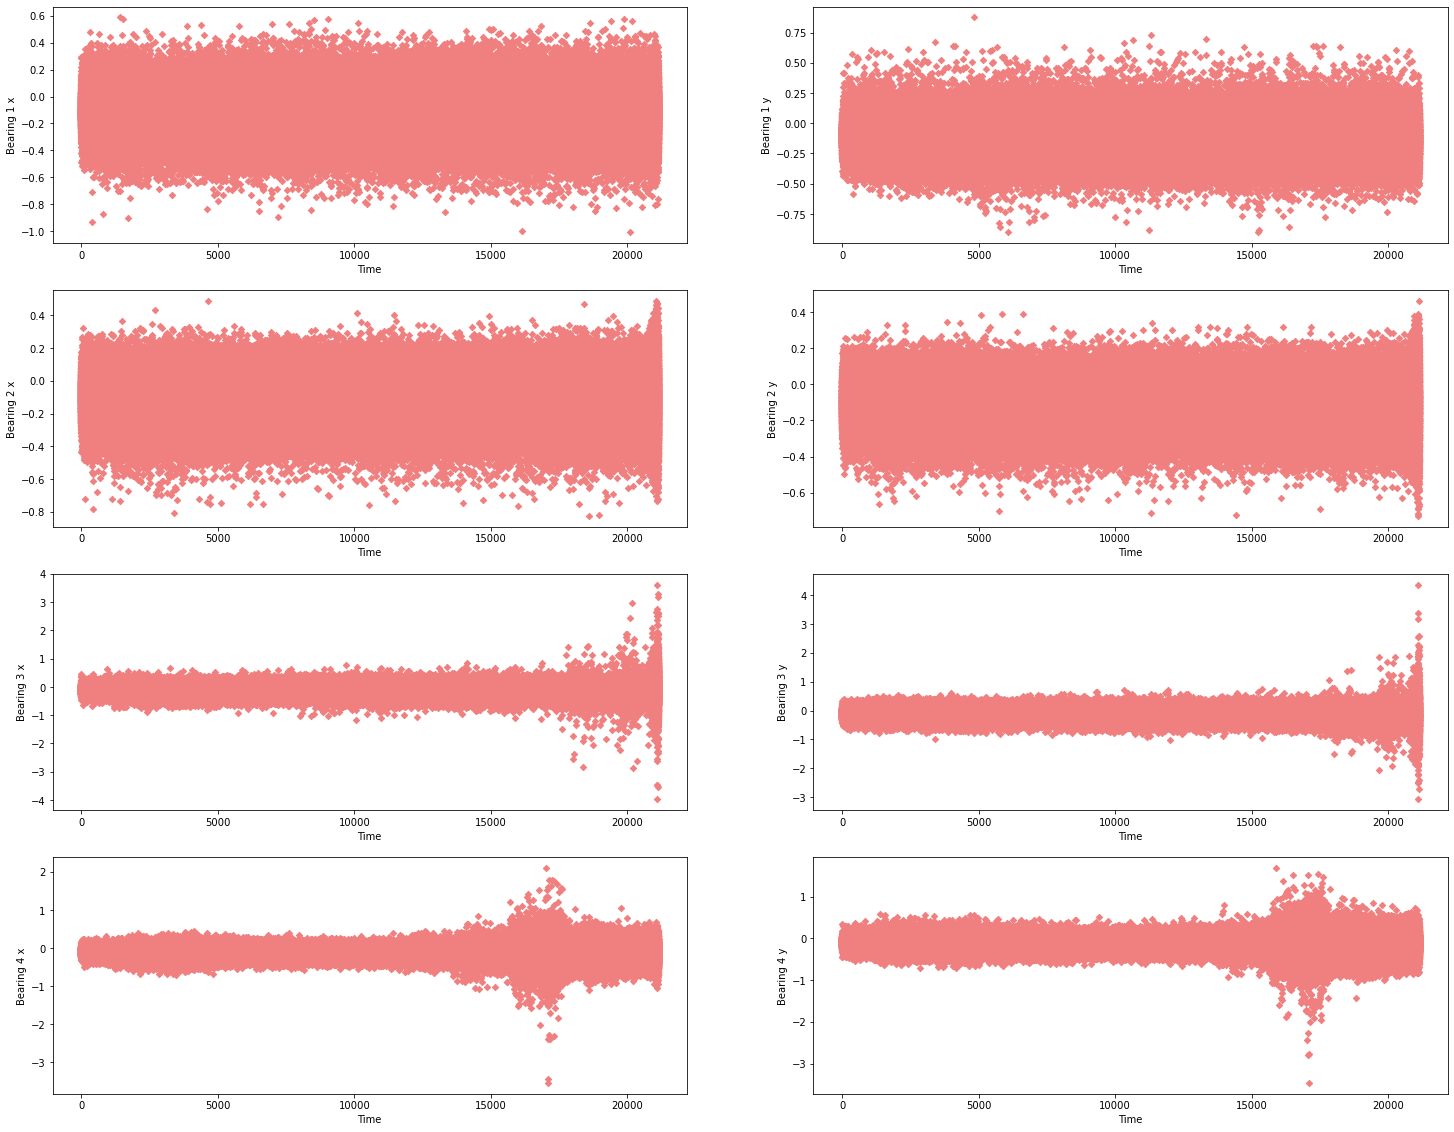

In [31]:
fig, ax = plt.subplots(4, 2, figsize=(25,20), squeeze=False)
makeCorrelationplot("Time","Bearing 1 x", data, ax[0,0])
makeCorrelationplot("Time","Bearing 1 y", data, ax[0,1])
makeCorrelationplot("Time","Bearing 2 x", data, ax[1,0])
makeCorrelationplot("Time","Bearing 2 y", data, ax[1,1])

makeCorrelationplot("Time","Bearing 3 x", data, ax[2,0])
makeCorrelationplot("Time","Bearing 3 y", data, ax[2,1])
makeCorrelationplot("Time","Bearing 4 x", data, ax[3,0])
makeCorrelationplot("Time","Bearing 4 y", data, ax[3,1])


plt.show()

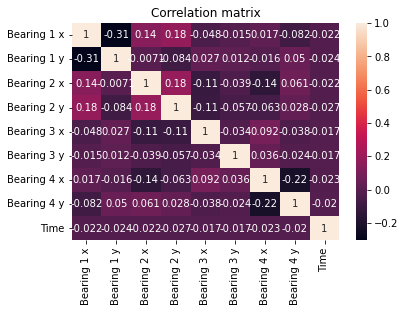

In [28]:
sns.heatmap(data.corr(), annot=True).set_title('Correlation matrix') 
plt.show()
#Dark shades represent negative correlation while lighter shades represent positive correlation.

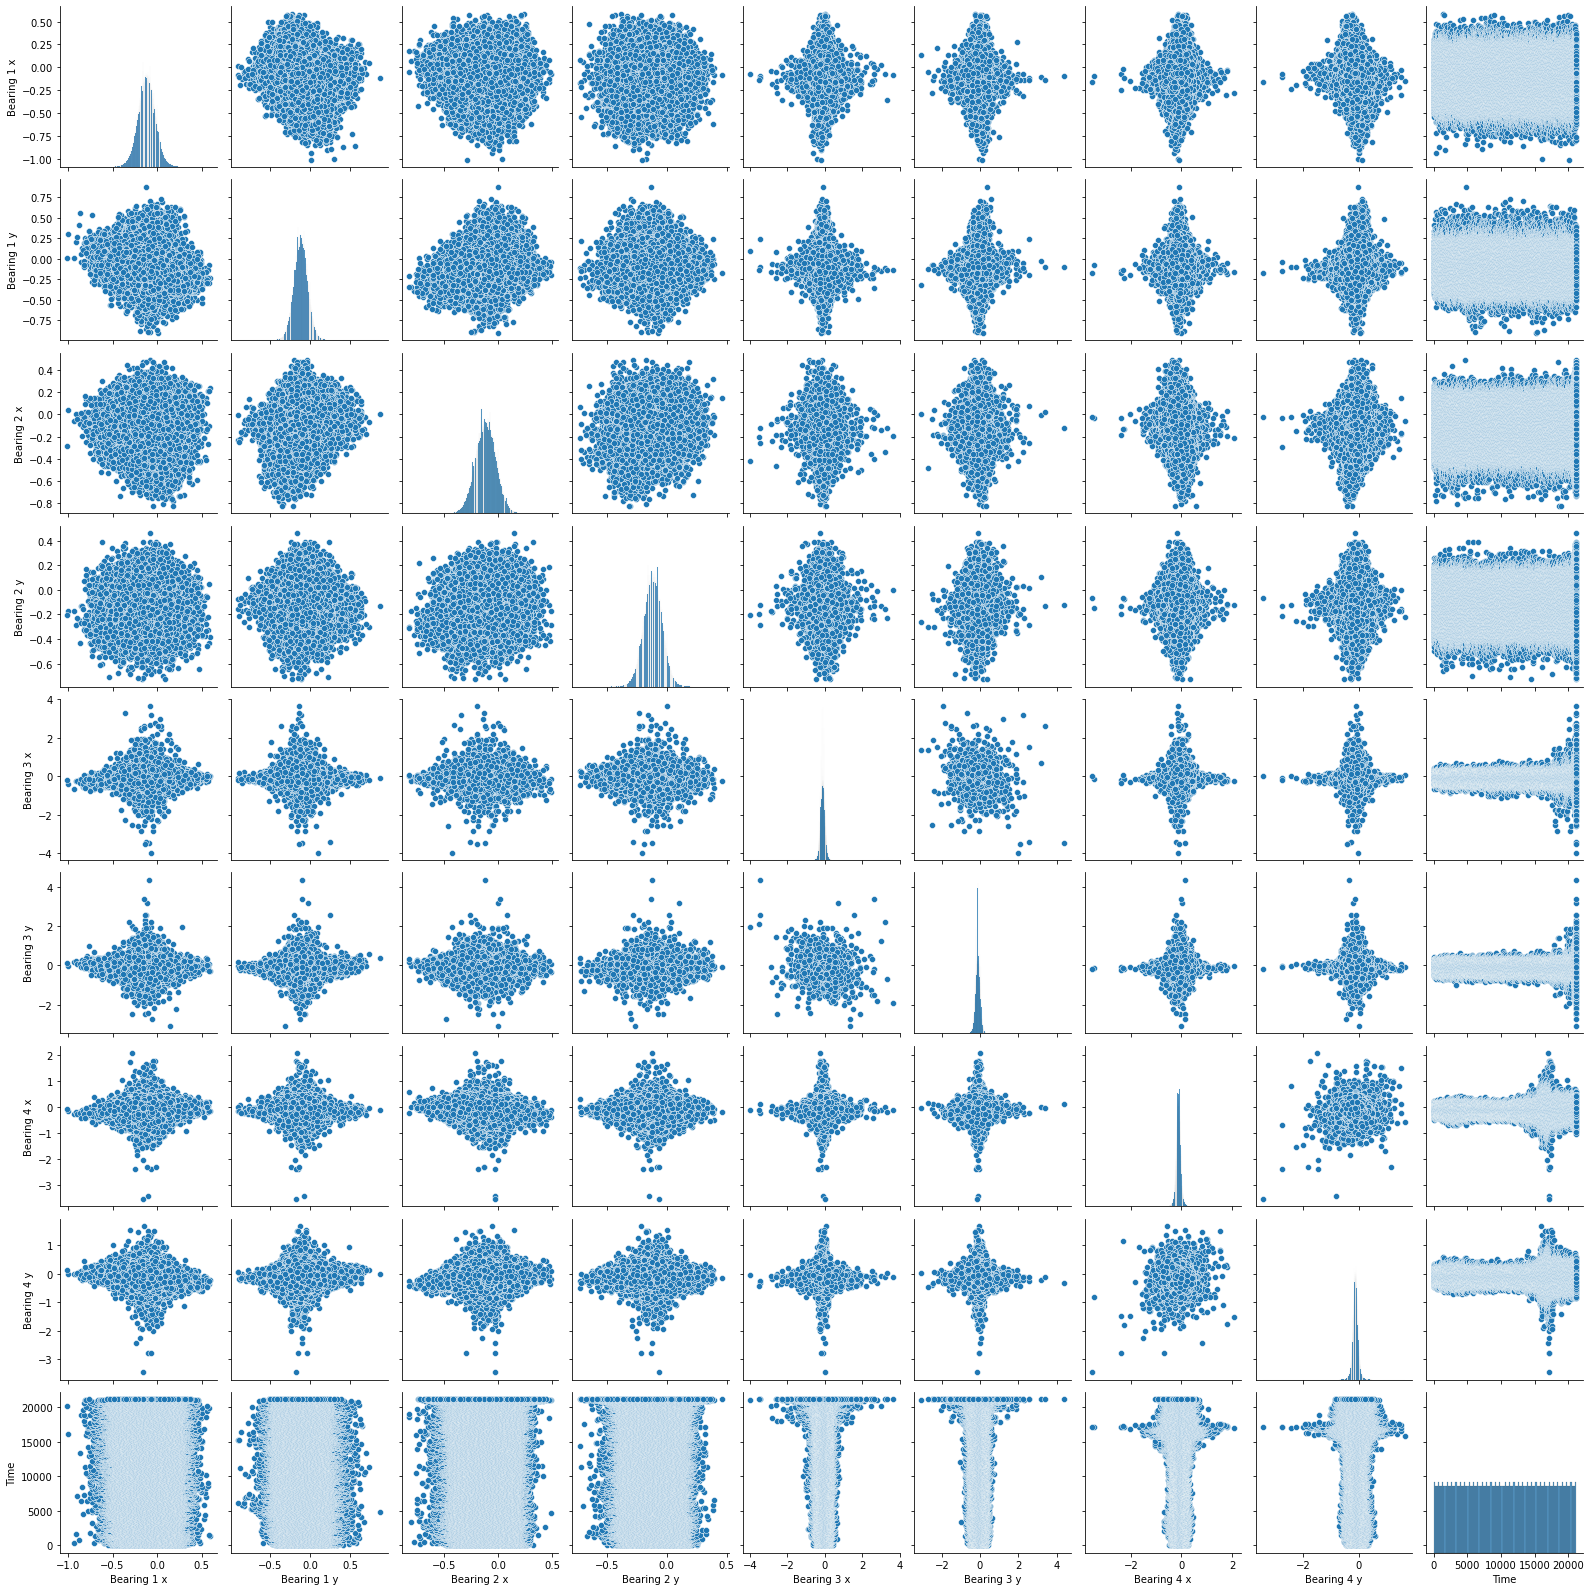

In [29]:
sns.pairplot(data)
plt.show()